In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('cleaned_data.xlsx')

In [3]:
df

,month,year,price
0,1,2008,504428.571429
1,2,2008,531080.000000
2,3,2008,563500.000000
3,4,2008,534204.545455
4,5,2008,522394.736842
...,...,...,...
127,8,2018,629684.079208
128,9,2018,658647.394464
129,10,2018,655744.728223
130,11,2018,654334.517241


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   month   132 non-null    int64  
 1   year    132 non-null    int64  
 2   price   132 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 3.2 KB


In [5]:
df['Index'] = list(range(1, 133))

In [6]:
df

,month,year,price,Index
0,1,2008,504428.571429,1
1,2,2008,531080.000000,2
2,3,2008,563500.000000,3
3,4,2008,534204.545455,4
4,5,2008,522394.736842,5
...,...,...,...,...
127,8,2018,629684.079208,128
128,9,2018,658647.394464,129
129,10,2018,655744.728223,130
130,11,2018,654334.517241,131


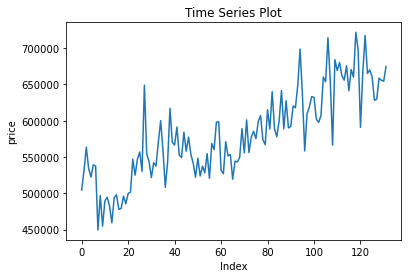

In [7]:
import matplotlib.pyplot as plt
plt.plot(df.index, df['price'])

# set the title and axis labels
plt.title('Time Series Plot')
plt.xlabel('Index')
plt.ylabel('price')

# display the plot
plt.show()

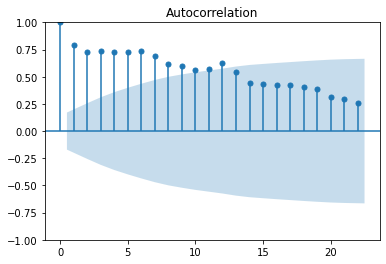

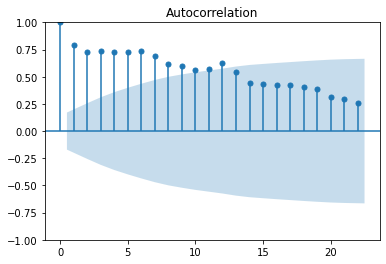

In [8]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['price'])

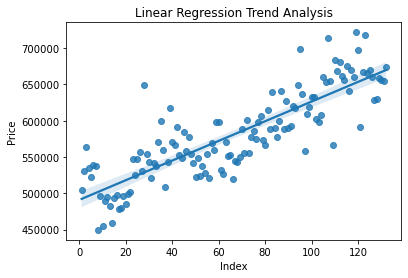

In [9]:
#Trend Analysis for Linear
import seaborn as sns
sns.regplot(x='Index', y='price', data=df)

# set the title and axis labels
plt.title('Linear Regression Trend Analysis')
plt.xlabel('Index')
plt.ylabel('Price')

# display the plot
plt.show()

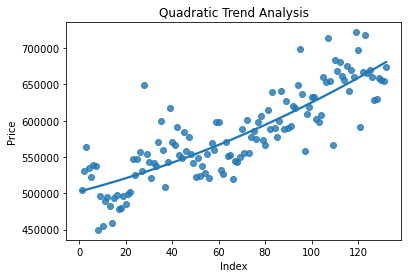

In [10]:
#Trend Analysis for Quadratic
import numpy as np
coeffs = np.polyfit(df['Index'], df['price'], 2)
quadratic_fit = np.polyval(coeffs, df['Index'])

# add the quadratic fit to the DataFrame
df['quadratic_fit'] = quadratic_fit

# create the plot
sns.regplot(x='Index', y='price', data=df, order=2, ci=None)

# set the title and axis labels
plt.title('Quadratic Trend Analysis')
plt.xlabel('Index')
plt.ylabel('Price')

# display the plot
plt.show()

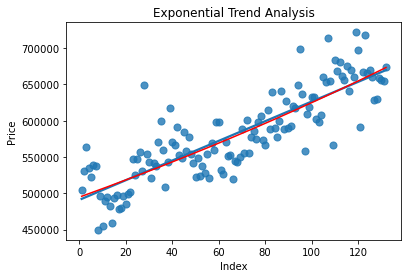

In [11]:
#Trend Analysis for Exponential
coeffs = np.polyfit(df['Index'], np.log(df['price']), 1)
exponential_fit = np.exp(np.polyval(coeffs, df['Index']))
# add the exponential fit to the DataFrame
df['exponential_fit'] = exponential_fit

# create the plot
sns.regplot(x='Index', y='price', data=df, order=1, ci=None, scatter_kws={'s': 50})
sns.lineplot(x='Index', y='exponential_fit', data=df, color='red')

# set the title and axis labels
plt.title('Exponential Trend Analysis')
plt.xlabel('Index')
plt.ylabel('Price')

# display the plot
plt.show()

In [12]:
df

,month,year,price,Index,quadratic_fit,exponential_fit
0,1,2008,504428.571429,1,503328.172589,495849.862544
1,2,2008,531080.000000,2,504175.965796,497008.878855
2,3,2008,563500.000000,3,505031.557056,498170.604290
3,4,2008,534204.545455,4,505894.946371,499335.045182
4,5,2008,522394.736842,5,506766.133738,500502.207877
...,...,...,...,...,...,...
127,8,2018,629684.079208,128,673390.136804,666993.899329
128,9,2018,658647.394464,129,675228.282819,668552.953525
129,10,2018,655744.728223,130,677074.226888,670115.651907
130,11,2018,654334.517241,131,678927.969011,671682.002993


In [13]:
#Dummy Variables
month_names = 'Month'
dummy_months = pd.get_dummies(df['month'],prefix=month_names)

In [14]:
dummy_months

,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
127,0,0,0,0,0,0,0,1,0,0,0,0
128,0,0,0,0,0,0,0,0,1,0,0,0
129,0,0,0,0,0,0,0,0,0,1,0,0
130,0,0,0,0,0,0,0,0,0,0,1,0


In [15]:
df = pd.concat((df,dummy_months), axis=1)

In [16]:
df

,month,year,price,Index,quadratic_fit,exponential_fit,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,1,2008,504428.571429,1,503328.172589,495849.862544,1,0,0,0,0,0,0,0,0,0,0,0
1,2,2008,531080.000000,2,504175.965796,497008.878855,0,1,0,0,0,0,0,0,0,0,0,0
2,3,2008,563500.000000,3,505031.557056,498170.604290,0,0,1,0,0,0,0,0,0,0,0,0
3,4,2008,534204.545455,4,505894.946371,499335.045182,0,0,0,1,0,0,0,0,0,0,0,0
4,5,2008,522394.736842,5,506766.133738,500502.207877,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,8,2018,629684.079208,128,673390.136804,666993.899329,0,0,0,0,0,0,0,1,0,0,0,0
128,9,2018,658647.394464,129,675228.282819,668552.953525,0,0,0,0,0,0,0,0,1,0,0,0
129,10,2018,655744.728223,130,677074.226888,670115.651907,0,0,0,0,0,0,0,0,0,1,0,0
130,11,2018,654334.517241,131,678927.969011,671682.002993,0,0,0,0,0,0,0,0,0,0,1,0


In [17]:
import statsmodels.api as sm

X = df['price'] 
y = df[['Index']+ list(dummy_months.columns)]

In [18]:
#Linear model without lag
model = sm.OLS(X,y).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     36.28
Date:                Tue, 16 May 2023   Prob (F-statistic):           4.19e-34
Time:                        15:59:19   Log-Likelihood:                -1540.6
No. Observations:                 132   AIC:                             3107.
Df Residuals:                     119   BIC:                             3145.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Index       1339.9560     68.463     19.572      0.0

In [19]:
df['lag(price_1)'] = df['price'].shift(1)

In [20]:
df

,month,year,price,Index,quadratic_fit,exponential_fit,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,lag(price_1)
0,1,2008,504428.571429,1,503328.172589,495849.862544,1,0,0,0,0,0,0,0,0,0,0,0,NaN
1,2,2008,531080.000000,2,504175.965796,497008.878855,0,1,0,0,0,0,0,0,0,0,0,0,504428.571429
2,3,2008,563500.000000,3,505031.557056,498170.604290,0,0,1,0,0,0,0,0,0,0,0,0,531080.000000
3,4,2008,534204.545455,4,505894.946371,499335.045182,0,0,0,1,0,0,0,0,0,0,0,0,563500.000000
4,5,2008,522394.736842,5,506766.133738,500502.207877,0,0,0,0,1,0,0,0,0,0,0,0,534204.545455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,8,2018,629684.079208,128,673390.136804,666993.899329,0,0,0,0,0,0,0,1,0,0,0,0,628073.993289
128,9,2018,658647.394464,129,675228.282819,668552.953525,0,0,0,0,0,0,0,0,1,0,0,0,629684.079208
129,10,2018,655744.728223,130,677074.226888,670115.651907,0,0,0,0,0,0,0,0,0,1,0,0,658647.394464
130,11,2018,654334.517241,131,678927.969011,671682.002993,0,0,0,0,0,0,0,0,0,0,1,0,655744.728223


In [21]:
import statsmodels.api as sm

X1 = df['price'] 
y1 = df[['Index','Month_1','Month_2','Month_3','Month_4','Month_5','Month_6','Month_7','Month_8','Month_9','Month_10','Month_11','Month_12','lag(price_1)']]

In [22]:
model = sm.OLS(X1,y1, missing='drop')
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     40.90
Date:                Tue, 16 May 2023   Prob (F-statistic):           2.56e-37
Time:                        15:59:19   Log-Likelihood:                -1517.2
No. Observations:                 131   AIC:                             3062.
Df Residuals:                     117   BIC:                             3103.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Index          834.7735    129.676      6.437      0.000     577.956    1091.591
Month_1       2.608e+05   4.33e+04      6.021      0.000    1.75e+05    3.47e+05
Month_2       3.086e+05   3.97e+04      7.766      0.000     2.3e+05    3.87e+05
Month_3       3.221e+05    4.2e+04      7.674      0.000    2.39e+05    4.05e+05
Month_4       3.035e+05    4.4e+04      6.903      0.000    2.16e+05    3.91e+05
Month_5       2.996e+05   4.32e+04      6.936      0.000    2.14e+05    3.85e+05
Month_6       2.934e+05   4.26e+04      6.889      0.000    2.09e+05    3.78e+05
Month_7       2.917e+05   4.19e+04      6.970      0.000    2.09e+05    3.75e+05
Month_8       2.816e+05   4.14e+04      6.797      0.000       2e+05    3.64e+05
Month_9       3.125e+05   4.04e+04      7.727      0.000    2.32e+05    3.93e+05
Month_10      2.993e+05   4.26e+04      7.026      0.000    2.15e+05    3.84e+05
Month_11      3.315e+05   4.24e+04      7.827      0.000    2.48e+05    4.15e+05
Month_12      2.988e+05   4.49e+04      6.651      0.000     2.1e+05    3.88e+05
lag(price_1)     0.3879      0.084      4.604      0.000       0.221       0.555
==============================================================================
Omnibus:                       20.003   Durbin-Watson:                   2.220
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.028
Skew:                           0.687   Prob(JB):                     1.50e-08
Kurtosis:                       5.171   Cond. No.                     3.51e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.51e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
df_new = pd.DataFrame({'Index':[133],
                        'Month_1': [1],
                       'Month_2': [0],
                      'Month_3': [0],
                      'Month_4': [0],
                      'Month_5':[0],
                       'Month_6':[0],
                       'Month_7':[0],
                       'Month_8':[0],
                       'Month_9':[0],
                       'Month_10':[0],
                       'Month_11':[0],
                       'Month_12':[0],
                      'lag(price_1)':['674591.105023']})

In [24]:
df_new.dtypes

Index            int64
Month_1          int64
Month_2          int64
Month_3          int64
Month_4          int64
Month_5          int64
Month_6          int64
Month_7          int64
Month_8          int64
Month_9          int64
Month_10         int64
Month_11         int64
Month_12         int64
lag(price_1)    object
dtype: object

In [25]:
df_new['lag(price_1)'] = df_new['lag(price_1)'].astype(float)


In [26]:
prediction = result.predict(df_new[['Index','Month_1','Month_2','Month_3','Month_4','Month_5','Month_6','Month_7','Month_8','Month_9','Month_10','Month_11','Month_12','lag(price_1)']])

print(prediction)

0    633442.479964
dtype: float64


In [27]:
df_new = pd.DataFrame({'Index':[134],
                        'Month_1': [0],
                       'Month_2': [1],
                      'Month_3': [0],
                      'Month_4': [0],
                      'Month_5':[0],
                       'Month_6':[0],
                       'Month_7':[0],
                       'Month_8':[0],
                       'Month_9':[0],
                       'Month_10':[0],
                       'Month_11':[0],
                       'Month_12':[0],
                      'lag(price_1)':['633442.479964']})

In [28]:
df_new['lag(price_1)'] = df_new['lag(price_1)'].astype(float)
prediction = result.predict(df_new[['Index','Month_1','Month_2','Month_3','Month_4','Month_5','Month_6','Month_7','Month_8','Month_9','Month_10','Month_11','Month_12','lag(price_1)']])

print(prediction)


0    666163.339965
dtype: float64


In [29]:
df_new = pd.DataFrame({'Index':[135],
                        'Month_1': [0],
                       'Month_2': [0],
                      'Month_3': [1],
                      'Month_4': [0],
                      'Month_5':[0],
                       'Month_6':[0],
                       'Month_7':[0],
                       'Month_8':[0],
                       'Month_9':[0],
                       'Month_10':[0],
                       'Month_11':[0],
                       'Month_12':[0],
                      'lag(price_1)':['666163.339965']})


df_new['lag(price_1)'] = df_new['lag(price_1)'].astype(float)
prediction = result.predict(df_new[['Index','Month_1','Month_2','Month_3','Month_4','Month_5','Month_6','Month_7','Month_8','Month_9','Month_10','Month_11','Month_12','lag(price_1)']])

print(prediction)


0    693178.714721
dtype: float64


In [30]:
df_new = pd.DataFrame({'Index':[136],
                        'Month_1': [0],
                       'Month_2': [0],
                      'Month_3': [0],
                      'Month_4': [1],
                      'Month_5':[0],
                       'Month_6':[0],
                       'Month_7':[0],
                       'Month_8':[0],
                       'Month_9':[0],
                       'Month_10':[0],
                       'Month_11':[0],
                       'Month_12':[0],
                      'lag(price_1)':['693178.714721']})


df_new['lag(price_1)'] = df_new['lag(price_1)'].astype(float)
prediction = result.predict(df_new[['Index','Month_1','Month_2','Month_3','Month_4','Month_5','Month_6','Month_7','Month_8','Month_9','Month_10','Month_11','Month_12','lag(price_1)']])

print(prediction)


0    685845.273255
dtype: float64


In [31]:
df_new = pd.DataFrame({'Index':[137],
                        'Month_1': [0],
                       'Month_2': [0],
                      'Month_3': [0],
                      'Month_4': [0],
                      'Month_5':[1],
                       'Month_6':[0],
                       'Month_7':[0],
                       'Month_8':[0],
                       'Month_9':[0],
                       'Month_10':[0],
                       'Month_11':[0],
                       'Month_12':[0],
                      'lag(price_1)':['685845.273255']})


df_new['lag(price_1)'] = df_new['lag(price_1)'].astype(float)
prediction = result.predict(df_new[['Index','Month_1','Month_2','Month_3','Month_4','Month_5','Month_6','Month_7','Month_8','Month_9','Month_10','Month_11','Month_12','lag(price_1)']])

print(prediction)


0    679982.897362
dtype: float64


In [32]:
df_new = pd.DataFrame({'Index':[138],
                        'Month_1': [0],
                       'Month_2': [0],
                      'Month_3': [0],
                      'Month_4': [0],
                      'Month_5':[0],
                       'Month_6':[1],
                       'Month_7':[0],
                       'Month_8':[0],
                       'Month_9':[0],
                       'Month_10':[0],
                       'Month_11':[0],
                       'Month_12':[0],
                      'lag(price_1)':['679982.897362']})


df_new['lag(price_1)'] = df_new['lag(price_1)'].astype(float)
prediction = result.predict(df_new[['Index','Month_1','Month_2','Month_3','Month_4','Month_5','Month_6','Month_7','Month_8','Month_9','Month_10','Month_11','Month_12','lag(price_1)']])

print(prediction)


0    672333.043025
dtype: float64


In [33]:
df_new = pd.DataFrame({'Index':[139],
                        'Month_1': [0],
                       'Month_2': [0],
                      'Month_3': [0],
                      'Month_4': [0],
                      'Month_5':[0],
                       'Month_6':[0],
                       'Month_7':[1],
                       'Month_8':[0],
                       'Month_9':[0],
                       'Month_10':[0],
                       'Month_11':[0],
                       'Month_12':[0],
                      'lag(price_1)':['672333.043025']})


df_new['lag(price_1)'] = df_new['lag(price_1)'].astype(float)
prediction = result.predict(df_new[['Index','Month_1','Month_2','Month_3','Month_4','Month_5','Month_6','Month_7','Month_8','Month_9','Month_10','Month_11','Month_12','lag(price_1)']])

print(prediction)


0    668497.870209
dtype: float64


## Decomposition Model

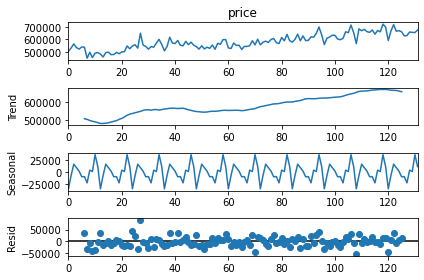

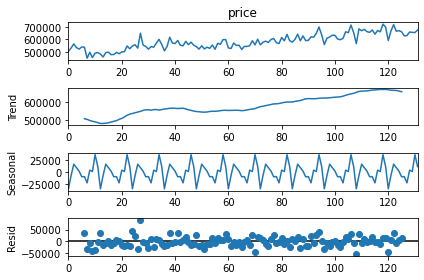

In [34]:
import statsmodels.api as sm

result = sm.tsa.seasonal_decompose(df['price'], model='additive', period=12)

result.plot()


# ARIMA Model

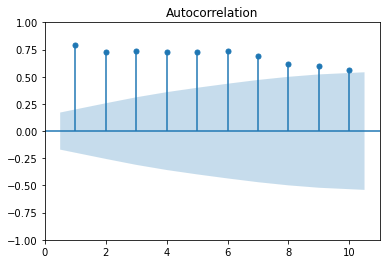

In [35]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Make ACF plot
plot_acf(df['price'], lags=10, zero=False)
plt.show()

/Users/arishbhayani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


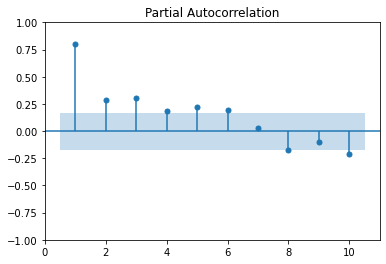

In [36]:
# Make PACF plot
plot_pacf(df['price'], lags=10, zero=False)
plt.show()

In [37]:
y = df['price']  # Selecting only the 'price' column

# Step 2: Fit the SARIMA model
order = (2, 0, 0)
seasonal_order = (0, 1, 1, 12)  # (p, d, q, seasonal_period)
model = sm.tsa.SARIMAX(y, order=order, seasonal_order=seasonal_order)
model_fit = model.fit()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.11174D+01    |proj g|=  7.31428D-01

At iterate    5    f=  1.09335D+01    |proj g|=  7.81864D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      8     10      1     0     0   2.517D-05   1.093D+01
  F =   10.931269812346034     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


In [39]:
print(model_fit.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                price   No. Observations:                  132
Model:             SARIMAX(2, 0, 0)x(0, 1, [1], 12)   Log Likelihood               -1442.928
Date:                              Tue, 16 May 2023   AIC                           2893.855
Time:                                      16:02:01   BIC                           2905.005
Sample:                                           0   HQIC                          2898.383
                                              - 132                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2230      0.043      5.222      0.000       0.139       0.307
ar.L2          0.03

In [40]:
forecast_periods = 7
predictions = model_fit.get_forecast(steps=forecast_periods)

# Step 4: Extract the predicted values and confidence intervals
predicted_values = predictions.predicted_mean
confidence_intervals = predictions.conf_int()

# Step 5: Print the predictions and confidence intervals
print("Predictions:")
print(predicted_values)
print("\nConfidence Intervals:")
print(confidence_intervals)

Predictions:
132    582063.061163
133    665341.549685
134    712941.788657
135    665624.740482
136    669011.726643
137    659857.906255
138    631133.016975
Name: predicted_mean, dtype: float64

Confidence Intervals:
       lower price    upper price
132  513663.710013  650462.412314
133  595262.078526  735421.020844
134  642612.501982  783271.075332
135  595270.252411  735979.228553
136  598654.344133  739369.109153
137  589500.205201  730215.607310
138  560775.280363  701490.753587


# Winters Method

In [41]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model_holt_winters = ExponentialSmoothing(df['price'], trend='add',
                                          seasonal='add', seasonal_periods=12)\
                                          .fit(optimized=True)

/Users/arishbhayani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [42]:
model_holt_winters.summary()

Dep. Variable:,price,No. Observations:,132
Model:,ExponentialSmoothing,SSE,100936029066.765
Optimized:,True,AIC,2732.054
Trend:,Additive,BIC,2778.178
Seasonal:,Additive,AICC,2738.107
Seasonal Periods:,12,Date:,"Tue, 16 May 2023"
Box-Cox:,False,Time:,16:07:25
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.3232143,alpha,True
smoothing_trend,0.0404018,beta,True


In [45]:
forecasts_holt = model_holt_winters.forecast(7)

In [46]:
forecasts_holt

132    612744.419430
133    650234.975578
134    672663.489648
135    664814.856632
136    659597.531899
137    649700.424329
138    646714.211460
dtype: float64

In [60]:
pred_py = pd.read_excel('predictions.xlsx')

In [61]:
pred_py

,Index,Reg,Win,Sar,Actual
0,133,633442.4800,612744.4194,582063.0612,603103.6496
1,134,666163.3400,650234.9756,665341.5497,624798.0882
2,135,693178.7147,672663.4896,712941.7887,651666.7373
3,136,685845.2733,664814.8566,665624.7405,655325.5613
4,137,679982.8974,659597.5319,669011.7266,641491.1364
5,138,672333.0430,649700.4243,659857.9063,703275.3968
6,139,668497.8702,646714.2115,631133.0170,583192.0560


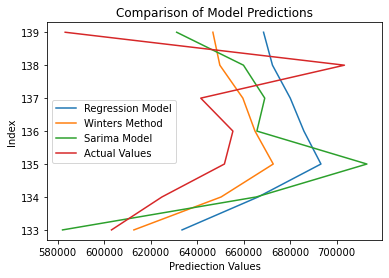

In [63]:
plt.plot(pred_py['Reg'], pred_py['Index'], label='Regression Model')
plt.plot(pred_py['Win'], pred_py['Index'], label='Winters Method')
plt.plot(pred_py['Sar'], pred_py['Index'], label='Sarima Model')
plt.plot(pred_py['Actual'], pred_py['Index'], label='Actual Values')

# Set the labels and title
plt.xlabel('Prediection Values')
plt.ylabel('Index')
plt.title('Comparison of Model Predictions')

# Add a legend
plt.legend()

# Display the plot
plt.show()